In [4]:
!pip install kaggle

   ---------------------------------------- 0.0/173.2 kB ? eta -:--:--
   -------------- ------------------------- 61.4/173.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 173.2/173.2 kB 3.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Samyak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import os

# Create directory if it doesn't exist
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Copy your kaggle.json file to this location or create it with your credentials
# Example of manually creating the file:
kaggle_cred = {
    "username": "",
    "key": ""
}

import json
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    json.dump(kaggle_cred, f)

# Set permissions
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

In [6]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Authenticate
api = KaggleApi()
api.authenticate()

# Download dataset (replace with your target dataset)
api.dataset_download_files('magdawjcicka/emotic', path='.', unzip=True)

# Path to the dataset
dataset_path = './emotic'

Dataset URL: https://www.kaggle.com/datasets/magdawjcicka/emotic


In [13]:
# Install PyTorch with CUDA support
# This installs the latest stable PyTorch with CUDA 12.1
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# Install other required dependencies
!pip install ultralytics streamlit transformers opencv-python

Looking in indexes: https://download.pytorch.org/whl/cu121



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Samyak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/949.1 kB ? eta -:--:--
   ------------------- -------------------- 471.0/949.1 kB 9.8 MB/s eta 0:00:01
   --------------------------------------- 949.1/949.1 kB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 32.0 MB/s eta 0:00:02
   -- ------------------------------------- 2.1/39.5 MB 26.5 MB/s eta 0:00:02
   -- ------------------------------------- 2.8/39.5 MB 22.5 MB/s eta 0:00:02
   -- ------------------------------------- 2.9/39.5 MB 20.6 MB/s eta 0:00:02
   --- ------------------------------------ 3.5/39.5 MB 18.6 MB/s eta 0:00:02
   ---- ----------------------------------- 4.1/39.5 MB 17.3 MB/s eta 0:00:03
   ---- ----------------------------------- 4.6/39.5 MB 16.4 MB/s eta 0:00:03
   ----- ---------------------------------- 5.2/39.5 MB 16.6 MB/s eta 0:00:03
   ----- ---------------------------------- 5.7/39.5 MB 16.0 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Samyak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import os
import kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

In [2]:
# Verify CUDA is available
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")

CUDA available: True
CUDA device count: 1
Current CUDA device: 0
Device name: NVIDIA GeForce RTX 3050 6GB Laptop GPU



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Samyak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


100%|██████████| 6.52M/6.52M [00:00<00:00, 14.2MB/s]



image 1/1 c:\Users\Samyak\Documents\projects\Body-language\sample.jpg: 640x480 4 persons, 157.6ms
Speed: 5.1ms preprocess, 157.6ms inference, 24.4ms postprocess per image at shape (1, 3, 640, 480)


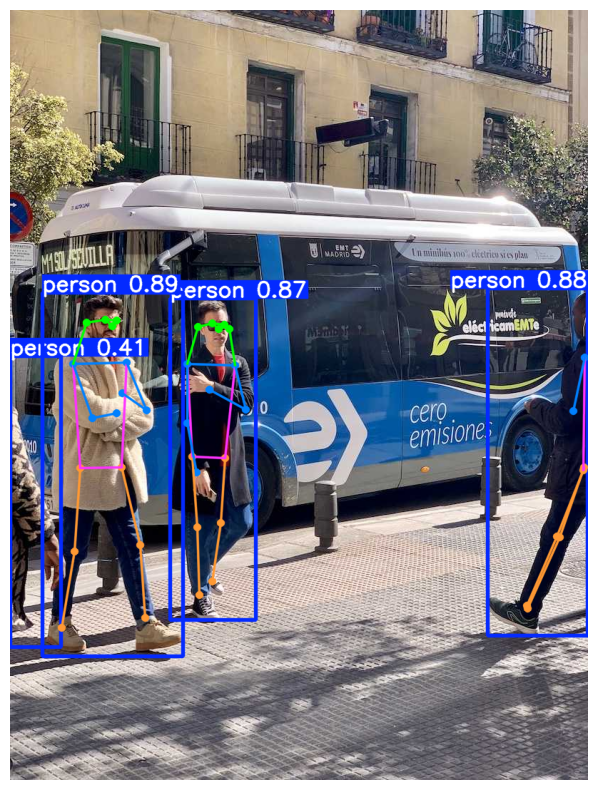

Found 17 keypoints
Sample keypoints (x, y, confidence):
[[     143.76      443.49     0.98343]
 [     149.05      435.13     0.90255]
 [      133.7      434.67      0.9725]]


In [3]:
# Download the YOLO pose model
from ultralytics import YOLO

# Load the YOLO pose estimation model
model = YOLO('yolov8n-pose.pt')  # n is for nano, you can use s, m, l, or x for larger models

# Test the model on a sample image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Download a sample image if needed
sample_img_path = 'sample.jpg'
if not os.path.exists(sample_img_path):
    # Download a sample image
    import urllib.request
    urllib.request.urlretrieve('https://ultralytics.com/images/bus.jpg', sample_img_path)

# Run inference
results = model(sample_img_path)

# Plot results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    plt.figure(figsize=(10, 10))
    plt.imshow(im)
    plt.axis('off')
    plt.show()

# Create a function to extract pose keypoints
def extract_pose_features(results):
    if results[0].keypoints is None:
        return None
    
    # Extract keypoints (x, y, confidence)
    keypoints = results[0].keypoints.data.cpu().numpy()
    
    # Return the keypoints data for the first person detected
    if len(keypoints) > 0:
        return keypoints[0]
    else:
        return None

# Test feature extraction
pose_features = extract_pose_features(results)
if pose_features is not None:
    print(f"Found {len(pose_features)} keypoints")
    print("Sample keypoints (x, y, confidence):")
    print(pose_features[:3])  # Show first 3 keypoints

In [27]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
from tqdm.notebook import tqdm
import cv2
import scipy.io as sio

class EMOTICBodyLanguageTrainer:
    def __init__(self, data_dir='./data'):
        self.data_dir = data_dir
        self.emotions = [
            'Affection', 'Anger', 'Annoyance', 'Anticipation', 'Aversion', 
            'Confidence', 'Disapproval', 'Disconnection', 'Disquietment', 
            'Doubt/Confusion', 'Embarrassment', 'Engagement', 'Esteem', 
            'Excitement', 'Fear', 'Happiness', 'Interest', 'Pain', 'Peace', 
            'Pleasure', 'Sadness', 'Sensitivity', 'Suffering', 'Surprise', 
            'Sympathy', 'Yearning'
        ]
        
        # Map emotions to body language categories
        self.emotion_to_bodylang = {
            'Anger': 'aggressive',
            'Disgust': 'defensive',
            'Fear': 'defensive',
            'Happiness': 'open',
            'Sadness': 'withdrawn',
            'Surprise': 'alert',
            'Affection': 'open',
            'Esteem': 'confident',
            'Excitement': 'energetic',
            'Embarrassment': 'closed',
            'Confidence': 'confident',
            'Engagement': 'engaged',
            'Anticipation': 'alert',
            'Annoyance': 'defensive',
            'Aversion': 'defensive',
            'Disconnection': 'withdrawn',
            'Doubt/Confusion': 'uncertain',
            'Interest': 'engaged',
            'Pain': 'defensive',
            'Yearning': 'reaching',
            'Sympathy': 'supportive',
            'Sensitivity': 'receptive', 
            'Suffering': 'weak',
            'Disquietment': 'nervous',
            'Peace': 'relaxed',
            'Pleasure': 'relaxed'
        }
        
        # Body language categories
        self.body_languages = sorted(set(self.emotion_to_bodylang.values()))
        print(f"Body language categories: {self.body_languages}")
        
    def prepare_yolo_dataset(self, output_dir='./emotic_yolo'):
        """Prepare EMOTIC dataset for YOLOv8 training"""
        print("Preparing EMOTIC dataset for YOLO training...")
        
        # Create directories for YOLO dataset
        os.makedirs(f"{output_dir}/images/train", exist_ok=True)
        os.makedirs(f"{output_dir}/images/val", exist_ok=True)
        os.makedirs(f"{output_dir}/images/test", exist_ok=True)
        os.makedirs(f"{output_dir}/labels/train", exist_ok=True)
        os.makedirs(f"{output_dir}/labels/val", exist_ok=True)
        os.makedirs(f"{output_dir}/labels/test", exist_ok=True)
        
        # Load annotation files
        train_df = pd.read_csv(os.path.join(self.data_dir, 'annots_arrs', 'annot_arrs_train.csv'))
        val_df = pd.read_csv(os.path.join(self.data_dir, 'annots_arrs', 'annot_arrs_val.csv'))
        test_df = pd.read_csv(os.path.join(self.data_dir, 'annots_arrs', 'annot_arrs_test.csv'))
        
        # Also load annotations.mat if needed
        annotations_mat_path = os.path.join(self.data_dir, 'annots_arrs', 'Annotations.mat')
        if os.path.exists(annotations_mat_path):
            try:
                annotations_mat = sio.loadmat(annotations_mat_path)
                print("Loaded Annotations.mat")
            except Exception as e:
                print(f"Error loading Annotations.mat: {e}")
                annotations_mat = None
        else:
            annotations_mat = None
        
        # Map dataset splits
        datasets = {
            'train': train_df,
            'val': val_df,
            'test': test_df
        }
        
        # Create class mapping file
        with open(f"{output_dir}/classes.txt", 'w') as f:
            for i, bl in enumerate(self.body_languages):
                f.write(f"{i} {bl}\n")
        
        # Process each dataset split
        for split_name, df in datasets.items():
            print(f"Processing {split_name} set with {len(df)} samples")
            
            # Create a YOLO dataset from the annotations
            self._process_split(df, split_name, output_dir)
        
        # Create YAML config for YOLOv8
        yaml_content = f"""
# EMOTIC Body Language Dataset
path: {os.path.abspath(output_dir)}
train: images/train
val: images/val
test: images/test

# Classes
nc: {len(self.body_languages)}  # number of classes
names: {self.body_languages}  # class names
"""

        yaml_path = f"{output_dir}/emotic_bodylang.yaml"
        with open(yaml_path, 'w') as f:
            f.write(yaml_content)
            
        print(f"YOLO dataset prepared at {output_dir}")
        return yaml_path
    
    def _process_split(self, df, split_name, output_dir):
        """Process a dataset split and create YOLO format annotations"""
        for i, row in tqdm(df.iterrows(), total=len(df), desc=f"Processing {split_name}"):
            try:
                # Load the image crop from numpy array
                img_path = os.path.join(self.data_dir, 'img_arrs', f"crop_arr_{split_name}_{i}.npy")
                if os.path.exists(img_path):
                    # Load image from numpy array
                    img_arr = np.load(img_path)
                    
                    # Convert to PIL Image
                    if img_arr.shape[2] == 3:  # RGB image
                        img = Image.fromarray(img_arr)
                    else:
                        print(f"Unexpected image shape: {img_arr.shape}")
                        continue
                    
                    # Save image for YOLO
                    img_save_path = os.path.join(output_dir, 'images', split_name, f"{i}.jpg")
                    img.save(img_save_path)
                    
                    # Get dimensions
                    width, height = img.size
                    
                    # Extract emotions from the row
                    # The format may vary based on your CSV structure
                    # Assuming emotions are in columns matching emotion names
                    emotions_scores = []
                    for emotion in self.emotions:
                        if emotion in df.columns:
                            score = row[emotion]
                            emotions_scores.append((emotion, score))
                    
                    # Get dominant emotion
                    if emotions_scores:
                        dominant_emotion = max(emotions_scores, key=lambda x: x[1])[0]
                        
                        # Map to body language
                        if dominant_emotion in self.emotion_to_bodylang:
                            body_lang = self.emotion_to_bodylang[dominant_emotion]
                            class_idx = self.body_languages.index(body_lang)
                            
                            # Create YOLO label
                            # Since we're using cropped images, the person takes the full image
                            # Format: class x_center y_center width height
                            x_center, y_center = 0.5, 0.5
                            w, h = 1.0, 1.0
                            
                            # Save label
                            label_path = os.path.join(output_dir, 'labels', split_name, f"{i}.txt")
                            with open(label_path, 'w') as f:
                                f.write(f"{class_idx} {x_center} {y_center} {w} {h}\n")
            except Exception as e:
                print(f"Error processing sample {i}: {e}")
    
    def train_yolo_model(self, yaml_path, epochs=7, imgsz=640, batch=16):
        """Train YOLOv8 model on the prepared dataset"""
        print(f"Training YOLOv8 model for {epochs} epochs...")
        
        # Initialize YOLOv8 model
        model = YOLO('yolov8n.pt')  # start with pre-trained model
        
        # Train the model
        results = model.train(
            data=yaml_path,
            epochs=epochs,
            imgsz=imgsz,
            batch=batch,
            name='emotic_bodylang',
            patience=20,
            device=0 if torch.cuda.is_available() else 'cpu'
        )
        
        print("Training complete!")
        return model
    
    def save_model(self, model, output_path='body_language_model.pt'):
        """Save the trained YOLOv8 model"""
        # YOLOv8 automatically saves models during training
        # Copy the best model to specified path
        if os.path.exists('runs/detect/emotic_bodylang/weights/best.pt'):
            import shutil
            shutil.copy('runs/detect/emotic_bodylang/weights/best.pt', output_path)
            print(f"Best model saved to {output_path}")
        else:
            print("Best model not found in expected location")

# Run the trainer
def train_body_language_yolo(data_dir='./data'):
    """Train and save a YOLOv8 model for body language detection using EMOTIC"""
    # Check CUDA availability
    print(f"Using device: {'CUDA' if torch.cuda.is_available() else 'CPU'}")
    
    # Create trainer
    trainer = EMOTICBodyLanguageTrainer(data_dir)
    
    # Prepare dataset
    yaml_path = trainer.prepare_yolo_dataset()
    
    # Train model
    model = trainer.train_yolo_model(yaml_path, epochs=30)
    
    # Save model
    trainer.save_model(model, 'body_language_model.pt')
    
    print("Body language model training completed!")
    return model

# Train the model
model = train_body_language_yolo()

Using device: CUDA
Body language categories: ['aggressive', 'alert', 'closed', 'confident', 'defensive', 'energetic', 'engaged', 'nervous', 'open', 'reaching', 'receptive', 'relaxed', 'supportive', 'uncertain', 'weak', 'withdrawn']
Preparing EMOTIC dataset for YOLO training...
Loaded Annotations.mat
Processing train set with 24639 samples


Processing train:   0%|          | 0/24639 [00:00<?, ?it/s]

Processing val set with 2397 samples


Processing val:   0%|          | 0/2397 [00:00<?, ?it/s]

Processing test set with 7279 samples


Processing test:   0%|          | 0/7279 [00:00<?, ?it/s]

YOLO dataset prepared at ./emotic_yolo
Training YOLOv8 model for 30 epochs...
Ultralytics 8.3.90  Python-3.11.9 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./emotic_yolo/emotic_bodylang.yaml, epochs=30, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=emotic_bodylang3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

train: Scanning C:\Users\Samyak\Documents\projects\Body-language\emotic_yolo\labels\train.cache... 24498 images, 141 backgrounds, 0 corrupt: 100%|██████████| 24639/24639 [00:00<?, ?it/s]
val: Scanning C:\Users\Samyak\Documents\projects\Body-language\emotic_yolo\labels\val.cache... 2386 images, 11 backgrounds, 0 corrupt: 100%|██████████| 2397/2397 [00:00<?, ?it/s]


Plotting labels to runs\detect\emotic_bodylang3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\emotic_bodylang3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.69G      1.056          4      1.563         50        640:   0%|          | 2/1540 [01:06<11:46:54, 27.58s/it]Exception in thread Thread-63 (plot_images):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Users\Samyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Samyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ultralytics\utils\plotting.py", line 683, in plot_images

: 